## Simple linear regression
#### In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable(`TV`).

#### Steps:
- Reading and understanding the data
- Visualizing the data
- Performing Simple Linear Regression
- Residual analysis
- Predictions on the Test Set

### Step 1: Reading and understanding the data

In [10]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
#Read the data file intp pandas dataframe
data= pd.read_csv('advertising.csv')

In [3]:
#lets see the firt few lines of the dataframe
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Here the rows are the spends of certain company across different media `Tv`, `Radio`, `Newspaper` for advertising and `sales` is the resultant sales generated by advertising across the media.

In [4]:
# lets go ahead and understand further more about the data
data.shape

(200, 4)

In [5]:
#Lets see the values of the table using info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#Lets see the distribution of the data using describe
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Step 2: Visualizing the data

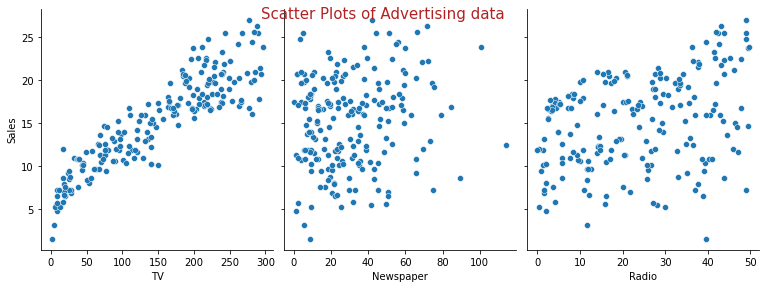

In [7]:
#Lets draw scatter plot to understand the spread of the data graphically
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',height=4, aspect=0.9, kind='scatter')
plt.suptitle("Scatter Plots of Advertising data",size=15, color='firebrick')
plt.show()

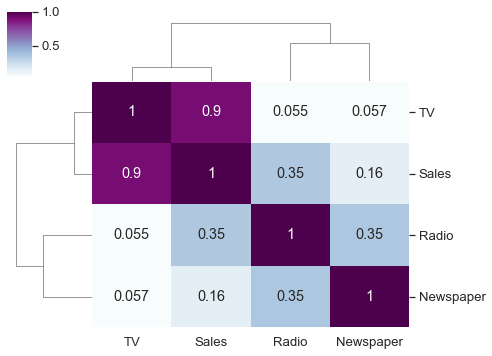

In [8]:
#Lets also see the correlation between the independent variables to the target variable
sns.set(font_scale=1.2) #fontsize
sns.clustermap(data.corr(),annot=True,figsize=(7, 5),cmap="BuPu") #clustermap gives heatmap+dendrogram
plt.show()

We can infere that, from pairplot and the heatmap, that `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

### Step 3: Building a simple linear model

Here
$y = c+ m \times TV$

The values of m are called the **model coefficients or model parameters**.


#### Generic Steps in model building using statsmodels:

In [9]:
# Creating X and y 
# X is independent variable and y is predictive variable
X= data['TV']
y=data['Sales']

In [11]:
#test train split using scikit learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [12]:
#fitting the line using statsmodel

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

C:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [14]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
#Stats models provides extensive summary details where scikit falls short 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           1.52e-52
Time:                        12:01:50   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

### Looking at some key statistics from the summary
The values we are concerned with are -

- The coefficients and significance (p-values)
- R-squared 
- F statistic and its significance

1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV. This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance

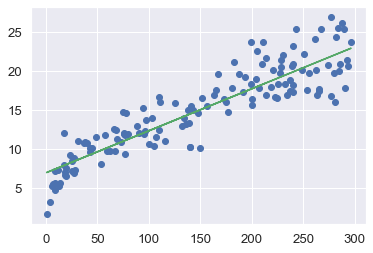

In [16]:
#showing original data train data set
plt.scatter(X_train, y_train)

#showing predicted data set
plt.plot(X_train, 6.948 + 0.054*X_train, 'g')

plt.show()

### Step 4: Residual analysis

To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms:

    We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear-regression), let us plot the histogram of the error terms and see what it looks like.

In [17]:
y_train_pred = lr.predict(X_train_sm) # or y_train_pred = 6.948 + 0.054*X_train
res = (y_train - y_train_pred)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


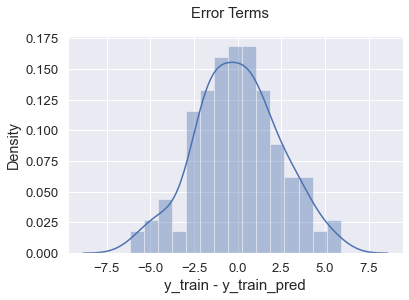

In [24]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

#### Looking for patterns in the residuals

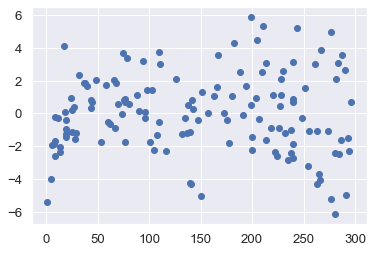

In [19]:
plt.scatter(X_train,res)
plt.show()

There are no patterns found in the residuals.

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.


The regression line is a pretty good fit to the data

### Step 5: Predictions on the Test Set
Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [ ]:
# to perform testing we have to add constant to x_test as well
X_test_sm= sm.add_constant(X_test)

#predicting the values of y from x_test set
y_pred=lr.predict(X_test_sm)
y_pred.head()

In [26]:
#import
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
# check RMSE and R-square values

#Returns the mean squared error; we'll take a square root
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

#Checking the R-squared on the test set
print('R-Squared :',r2_score(y_test, y_pred))


RMSE : 2.0192960089662337
R-Squared : 0.7921031601245656


#### Lets check the fit with the test set


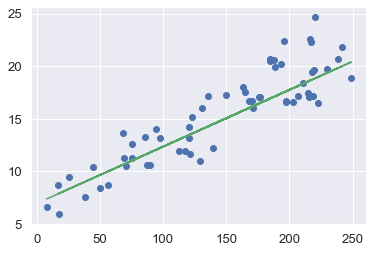

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'g')
plt.show()

### Linear Regression using linear_model in sklearn
Apart from statsmodels, there is another package namely sklearn that can be used to perform linear regression. We will use the linear_model library from sklearn to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [35]:
# Lets do the same split as we did before, random_state=100 ensures that it makes the same split everytime.
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [37]:
# In sklearn we have to reshape the X_test_lm and X_train_lm
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [38]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [40]:
#Lets print the parameters of the fitted model
print(lm.intercept_)
print(lm.coef_)

6.94868320000136
[0.05454575]


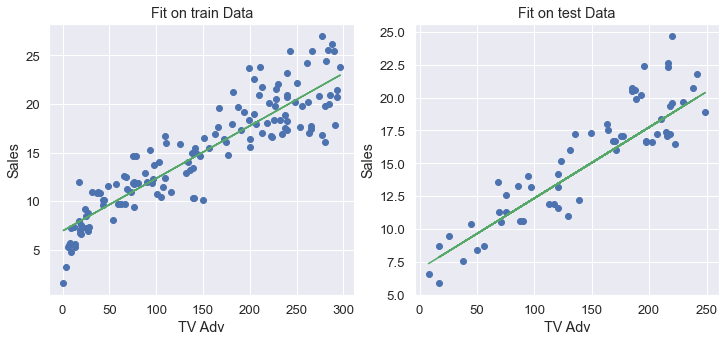

In [51]:
#showing original data train data set
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.scatter(X_train_lm, y_train_lm)

#showing predicted data set
plt.plot(X_train_lm, 6.948 + 0.054*X_train_lm, 'g')
plt.xlabel("TV Adv")
plt.ylabel("Sales")
plt.title("Fit on train Data")


plt.subplot(1,2,2)
plt.scatter(X_test_lm, y_test_lm)
plt.plot(X_test_lm, 6.948 + 0.054 * X_test_lm, 'g')
plt.xlabel("TV Adv")
plt.ylabel("Sales")
plt.title("Fit on test Data")
plt.show()

#### Conclusion:

    - We performed simple linear regression on `TV Adv spends` / independent variable with `sales` / Target Variable.
    - We used StatsModels and Scikit Learn to build the model to see the differences.